In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

day csv file read 

In [117]:
train = pd.read_csv("/content/drive/MyDrive/bike sharing/Bike-Sharing-Dataset/day.csv")

Target column = count

In [118]:
train

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [119]:
train['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [120]:
train['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

Hour csv file

In [121]:
hr = pd.read_csv('/content/drive/MyDrive/bike sharing/Bike-Sharing-Dataset/hour.csv')

in hour csv file here we have hr data_column which is very important for machine learning model so here we are doing analysis using hour csv file

In [122]:
hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [124]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


as we can see that hour csv file have more data than day csv as well as all the in day csv has in hour data so we are using hour data for machine learning analysis

In [125]:
hr.shape

(17379, 17)

In [126]:
hr.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [127]:
hr['hr'].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

**Feature Engineering**

In [128]:
hr.dteday = pd.to_datetime(hr.dteday)

In [129]:
hr["day"] = hr['dteday'].map(lambda x: x.day)
hr["month"] = hr['dteday'].map(lambda x: x.month)
hr["year"] = hr['dteday'].map(lambda x: x.year)
hr['weekend'] = hr.weekday.map(lambda x:(x in [5,6]))
hr['peak_hour'] = hr.hr.map(lambda x:(x in [7,8,9,16,17,18,19]))
hr['afternoon'] = hr.hr.map(lambda x:(x in range(11,19)))
hr['good_weather'] = hr.weathersit.map(lambda x:(x in [1,2]))

In [130]:
hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year,weekend,peak_hour,afternoon,good_weather
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,1,2011,True,False,False,True
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,1,2011,True,False,False,True
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,1,2011,True,False,False,True
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,1,2011,True,False,False,True
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,1,2011,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31,12,2012,False,True,False,True
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31,12,2012,False,False,False,True
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31,12,2012,False,False,False,True
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31,12,2012,False,False,False,True


data visualisation

In [131]:
hr['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [132]:
hr['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [133]:
hr['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

In [134]:
hr['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [135]:
# Converting into categorical data
category_list = ['season', 'holiday', 'workingday', 'weathersit']
for var in category_list:
    hr[var] = hr[var].astype('category')
   

In [136]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   yr            17379 non-null  int64         
 4   mnth          17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  category      
 9   weathersit    17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [137]:
# Mapping numbers to understandable text
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
hr['season'] = hr['season'].map(season_dict)
hr['weathersit'] = hr['weathersit'].map(weather_dict)





In [138]:
hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year,weekend,peak_hour,afternoon,good_weather
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16,1,1,2011,True,False,False,True
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40,1,1,2011,True,False,False,True
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32,1,1,2011,True,False,False,True
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13,1,1,2011,True,False,False,True
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1,1,1,2011,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,1,12,19,0,1,1,Misty+Cloudy,0.26,0.2576,0.60,0.1642,11,108,119,31,12,2012,False,True,False,True
17375,17376,2012-12-31,Spring,1,12,20,0,1,1,Misty+Cloudy,0.26,0.2576,0.60,0.1642,8,81,89,31,12,2012,False,False,False,True
17376,17377,2012-12-31,Spring,1,12,21,0,1,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90,31,12,2012,False,False,False,True
17377,17378,2012-12-31,Spring,1,12,22,0,1,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61,31,12,2012,False,False,False,True


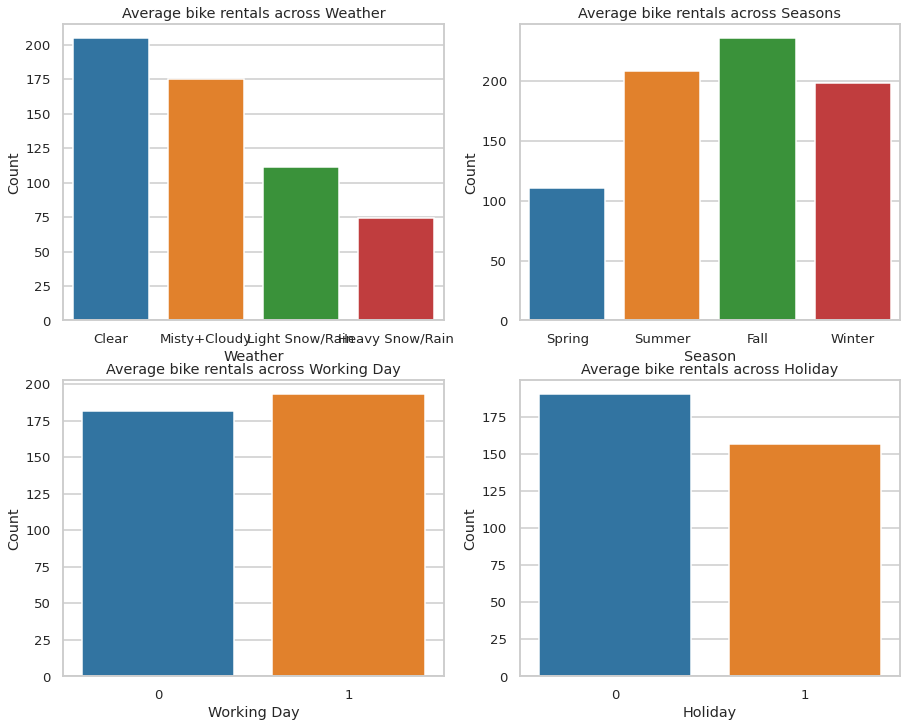

In [139]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(hr.groupby(['weathersit'])['cnt'].mean()).reset_index()
sns.barplot(data=group_weather, x='weathersit', y='cnt', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(hr.groupby(['season'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='cnt', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(hr.groupby(['workingday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='cnt', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(hr.groupby(['holiday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='cnt', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show()

1 graph = when weather is clear there is incresing the rent of bike
as well as when weather is extremly bad then decresing the rent of bike

in practical way we can say that when there is working day people reqired bike to travel also see the graph



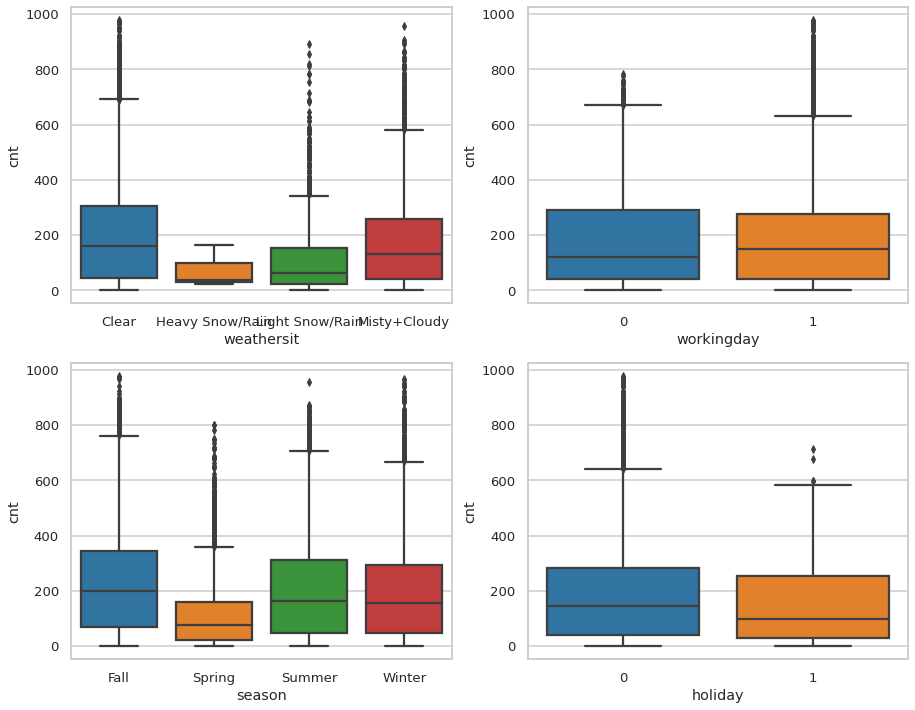

In [140]:
# Seaborn boxplots to get an idea of the distribution/outliers
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear', 'Heavy Snow/Rain', 'Light Snow/Rain', 'Misty+Cloudy']
sns.boxplot(data=hr, y='cnt', x='weathersit', ax=axes[0][0], order=hue_order)
sns.boxplot(data=hr, y='cnt', x='workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=hr, y='cnt', x='season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=hr, y='cnt', x='holiday', ax=axes[1][1])

plt.show()

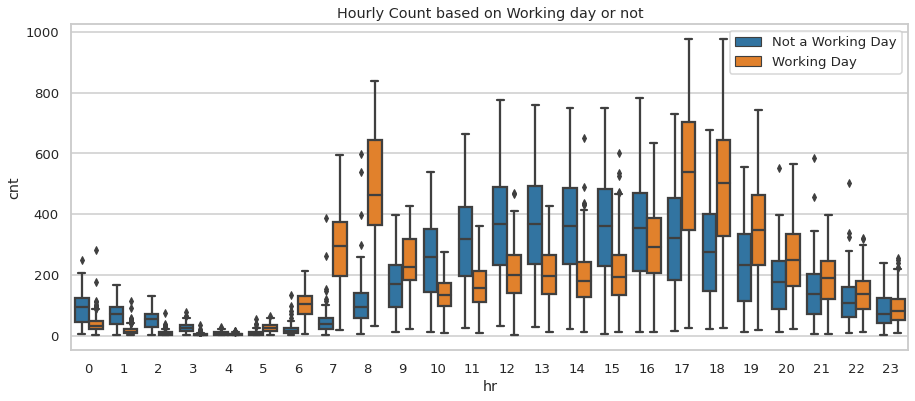

In [141]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=hr, y='cnt', x='hr', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

7 am and 8am 
5 pm and 6 pm have increase count

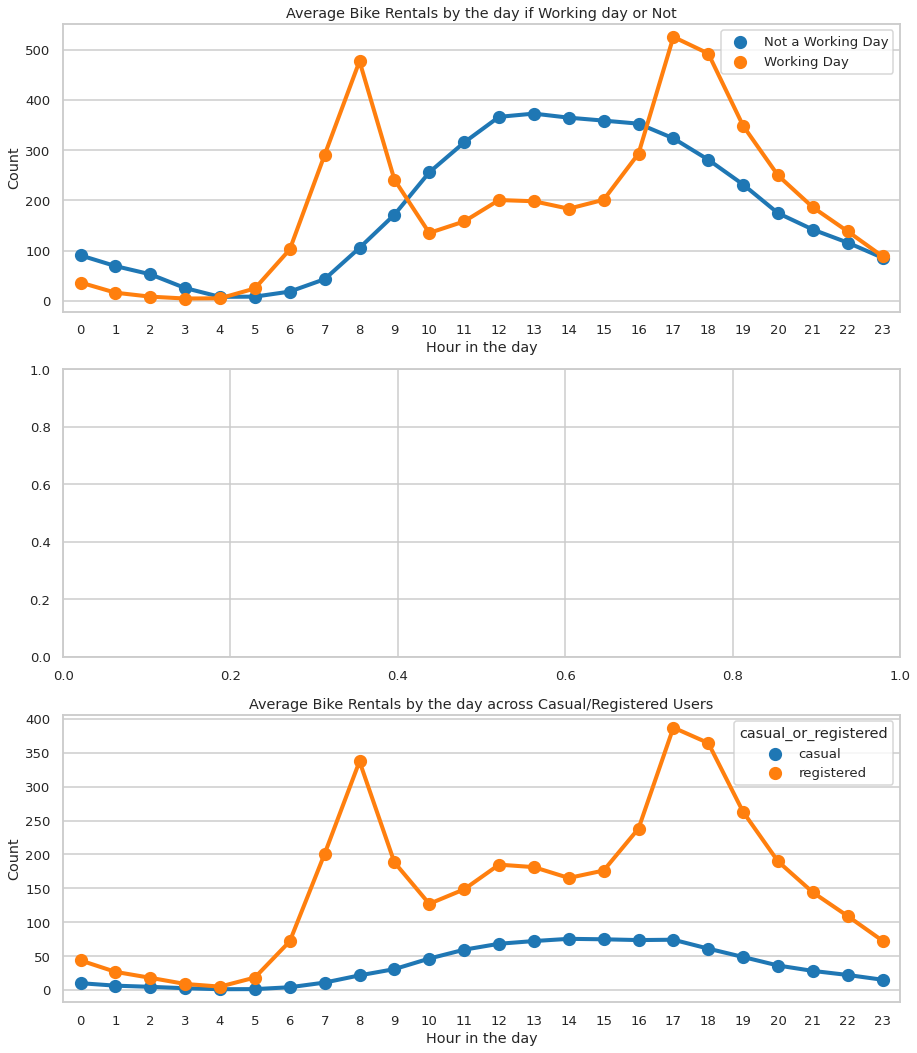

In [142]:
# Plots of average count across hour in a day for various categories

f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(hr.groupby(['workingday', 'hr'])['cnt'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hr', y='cnt', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')


df_melt = pd.melt(frame=hr, id_vars='hr', value_vars=['casual', 'registered'], value_name='cnt', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hr', 'casual_or_registered'])['cnt'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hr', y='cnt', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Casual/Registered Users')

plt.show()

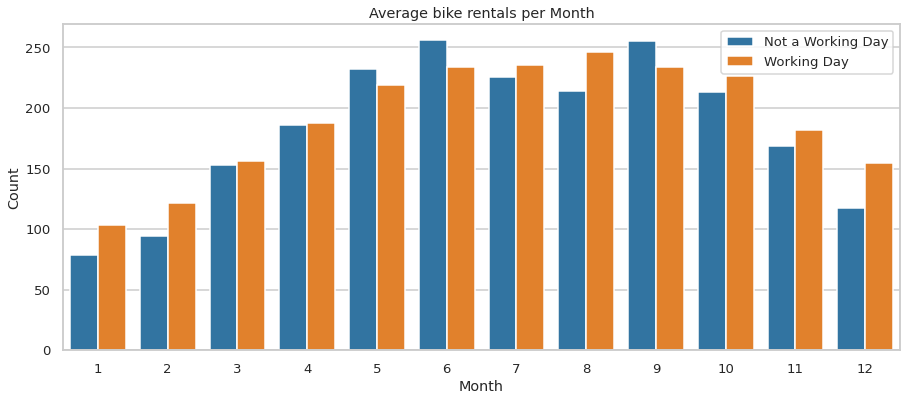

In [143]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(hr.groupby(['month', 'workingday'])['cnt'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='cnt', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

In [144]:
hr

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year,weekend,peak_hour,afternoon,good_weather
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16,1,1,2011,True,False,False,True
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40,1,1,2011,True,False,False,True
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32,1,1,2011,True,False,False,True
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13,1,1,2011,True,False,False,True
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1,1,1,2011,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,1,12,19,0,1,1,Misty+Cloudy,0.26,0.2576,0.60,0.1642,11,108,119,31,12,2012,False,True,False,True
17375,17376,2012-12-31,Spring,1,12,20,0,1,1,Misty+Cloudy,0.26,0.2576,0.60,0.1642,8,81,89,31,12,2012,False,False,False,True
17376,17377,2012-12-31,Spring,1,12,21,0,1,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90,31,12,2012,False,False,False,True
17377,17378,2012-12-31,Spring,1,12,22,0,1,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61,31,12,2012,False,False,False,True


In [145]:
hr.drop(['dteday','yr','mnth','instant'],axis =1,inplace = True)

In [146]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        17379 non-null  category
 1   hr            17379 non-null  int64   
 2   holiday       17379 non-null  category
 3   weekday       17379 non-null  int64   
 4   workingday    17379 non-null  category
 5   weathersit    17379 non-null  category
 6   temp          17379 non-null  float64 
 7   atemp         17379 non-null  float64 
 8   hum           17379 non-null  float64 
 9   windspeed     17379 non-null  float64 
 10  casual        17379 non-null  int64   
 11  registered    17379 non-null  int64   
 12  cnt           17379 non-null  int64   
 13  day           17379 non-null  int64   
 14  month         17379 non-null  int64   
 15  year          17379 non-null  int64   
 16  weekend       17379 non-null  bool    
 17  peak_hour     17379 non-null  bool    
 18  aftern

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [148]:
hr['weekend'] = le.fit_transform(hr['weekend'])
hr['peak_hour'] = le.fit_transform(hr['peak_hour'])
hr['afternoon'] = le.fit_transform(hr['afternoon'])
hr['good_weather'] = le.fit_transform(hr['good_weather'])
hr['season'] = le.fit_transform(hr['season'])
hr['holiday'] = le.fit_transform(hr['holiday'])
hr['workingday'] = le.fit_transform(hr['workingday'])
hr['weathersit'] = le.fit_transform(hr['weathersit'])

In [149]:
hr['year'].value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [150]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        17379 non-null  int64  
 1   hr            17379 non-null  int64  
 2   holiday       17379 non-null  int64  
 3   weekday       17379 non-null  int64  
 4   workingday    17379 non-null  int64  
 5   weathersit    17379 non-null  int64  
 6   temp          17379 non-null  float64
 7   atemp         17379 non-null  float64
 8   hum           17379 non-null  float64
 9   windspeed     17379 non-null  float64
 10  casual        17379 non-null  int64  
 11  registered    17379 non-null  int64  
 12  cnt           17379 non-null  int64  
 13  day           17379 non-null  int64  
 14  month         17379 non-null  int64  
 15  year          17379 non-null  int64  
 16  weekend       17379 non-null  int64  
 17  peak_hour     17379 non-null  int64  
 18  afternoon     17379 non-nu

In [151]:
hr.corr()

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,year,weekend,peak_hour,afternoon,good_weather
season,1.000000,-0.001354,0.014444,-0.009910,-0.007303,0.073631,-0.361958,-0.335197,0.082580,-0.008939,-0.064472,0.005234,-0.013157,-0.015766,0.325234,-0.006572,-0.005858,-0.001224,-0.001433,-0.037786
hr,-0.001354,1.000000,0.000479,-0.003498,0.002285,-0.042970,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,0.001538,-0.005772,-0.003867,-0.003773,0.175853,0.303649,-0.016958
holiday,0.014444,0.000479,1.000000,-0.102088,-0.252471,-0.004883,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.010132,0.018430,0.006692,-0.072868,0.000270,0.000196,0.023750
weekday,-0.009910,-0.003498,-0.102088,1.000000,0.035955,0.002887,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002145,0.010400,-0.004485,0.791675,-0.001372,-0.001608,-0.002173
workingday,-0.007303,0.002285,-0.252471,0.035955,1.000000,0.037842,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,0.008627,-0.003477,-0.002196,-0.265998,0.000590,0.000717,-0.032102
weathersit,0.073631,-0.042970,-0.004883,0.002887,0.037842,1.000000,-0.094614,-0.093869,0.345302,-0.019890,-0.121257,-0.079072,-0.098941,-0.004816,0.012239,-0.001956,-0.007085,-0.001258,-0.002563,-0.234844
temp,-0.361958,0.137603,-0.027340,-0.001795,0.055390,-0.094614,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,0.027180,0.201691,0.040913,-0.026023,0.036939,0.201221,0.063361
atemp,-0.335197,0.133750,-0.030973,-0.008821,0.054667,-0.093869,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929,0.021269,0.208096,0.039222,-0.033026,0.033423,0.190701,0.069339
hum,0.082580,-0.276498,-0.010588,-0.037158,0.015688,0.345302,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911,0.025663,0.164411,-0.083546,-0.035420,-0.085189,-0.397742,-0.310275
windspeed,-0.008939,0.137252,0.003988,0.011502,-0.011830,-0.019890,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234,0.010505,-0.135386,-0.008740,0.006425,0.080385,0.208550,-0.070022


In [152]:
x = hr.drop(['cnt'],axis =1)
y = hr['cnt']

In [153]:
x

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day,month,year,weekend,peak_hour,afternoon,good_weather
0,1,0,0,6,0,0,0.24,0.2879,0.81,0.0000,3,13,1,1,2011,1,0,0,1
1,1,1,0,6,0,0,0.22,0.2727,0.80,0.0000,8,32,1,1,2011,1,0,0,1
2,1,2,0,6,0,0,0.22,0.2727,0.80,0.0000,5,27,1,1,2011,1,0,0,1
3,1,3,0,6,0,0,0.24,0.2879,0.75,0.0000,3,10,1,1,2011,1,0,0,1
4,1,4,0,6,0,0,0.24,0.2879,0.75,0.0000,0,1,1,1,2011,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,1,3,0.26,0.2576,0.60,0.1642,11,108,31,12,2012,0,1,0,1
17375,1,20,0,1,1,3,0.26,0.2576,0.60,0.1642,8,81,31,12,2012,0,0,0,1
17376,1,21,0,1,1,0,0.26,0.2576,0.60,0.1642,7,83,31,12,2012,0,0,0,1
17377,1,22,0,1,1,0,0.26,0.2727,0.56,0.1343,13,48,31,12,2012,0,0,0,1


In [154]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit(x).transform(x)
x

array([[-0.43042391, -1.67000398, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051],
       [-0.43042391, -1.52537422, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051],
       [-0.43042391, -1.38074446, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051],
       ...,
       [-0.43042391,  1.36722104, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051],
       [-0.43042391,  1.51185081, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051],
       [-0.43042391,  1.65648057, -0.1721122 , ..., -0.64420304,
        -0.71049674,  0.29852051]])

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [156]:

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR

LinearRegression()

In [157]:
LR.fit(X_train,y_train)

LinearRegression()

In [158]:
LR_pred=LR.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error
lr_mse = (mean_squared_error(y_test,LR_pred))

In [160]:
lr_mse

3.15870291454815e-26

In [161]:
from sklearn.metrics import mean_squared_log_error
lr_msle =(mean_squared_log_error(y_test,LR_pred))

In [162]:
lr_msle

1.50505060941632e-28

In [163]:
from sklearn.tree import DecisionTreeRegressor

In [164]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [165]:
DTree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [166]:
DT_pread =DTree.predict(X_test)

In [167]:
from sklearn.metrics import mean_squared_error
DT_mse = (mean_squared_error(y_test,DT_pread))

In [168]:
DT_mse

20.465509525636104

In [169]:
from sklearn.metrics import mean_squared_log_error
DT_msle =(mean_squared_log_error(y_test,DT_pread))

In [170]:
DT_msle

0.00035387384799849455

In [171]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [172]:
RForest.fit(X_train,y_train)
RF_pread=RForest.predict(X_test)

In [173]:
from sklearn.metrics import mean_squared_error
RF_mse = (mean_squared_error(y_test,RF_pread))

In [174]:
RF_mse

8.511656411265252

In [175]:
from sklearn.metrics import mean_squared_log_error
RF_msle =(mean_squared_log_error(y_test,RF_pread))

In [176]:
RF_msle

0.0001768691136442735

In [177]:
from sklearn.svm import SVR

In [178]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [179]:
svr_pred=svr.predict(X_test)

In [180]:
from sklearn.metrics import mean_squared_error
svr_mse = (mean_squared_error(y_test,svr_pred))

In [181]:
svr_mse

2571.7016651364293

In [182]:
from xgboost import XGBRegressor

In [183]:
xgb = XGBRegressor(random_state=0,n_jobs=-1)

In [184]:
xgb_fit = xgb.fit(X_train,y_train)

[07:55:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [185]:
xgb_pred = xgb_fit.predict(X_test)

In [186]:
from sklearn.metrics import mean_squared_error
xgb_mse = (mean_squared_error(y_test,xgb_pred))

In [187]:
xgb_mse

29.543116916664886

In [188]:
from sklearn.metrics import mean_squared_log_error
xgb_msle =(mean_squared_log_error(y_test,xgb_pred))

In [189]:
xgb_msle

0.0034055323070753497

In [190]:
params_grid = {'n_estimators' : [200,300,400],
               'learning_rate' : [0.1,0.2,0.3],
               'max_depth' : [3,5,6]}

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
xgbgrid = GridSearchCV(XGBRegressor(),params_grid)

In [193]:
grid_search = xgbgrid.fit(X_train,y_train)

[07:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [194]:
xgb_grid_pred = grid_search.predict(X_test)

In [195]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [200, 300, 400]})>

In [196]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}

In [197]:
from sklearn.metrics import mean_squared_error
xgbg_mse = (mean_squared_error(y_test,xgb_grid_pred))

In [198]:
xgbg_mse

5.6735303191072

In [199]:
from sklearn.metrics import mean_squared_log_error
xgb_grid_msle =(mean_squared_log_error(xgb_grid_pred,y_test))

In [200]:
xgb_grid_msle

0.00017754628213084277

In [201]:
!pip install catboost

In [202]:
from catboost import CatBoostRegressor

In [203]:
cb = CatBoostRegressor(random_state=0,iterations=3000)

In [204]:
cb_fit = cb.fit(X_train,y_train)

Learning rate set to 0.025881
0:	learn: 177.8626014	total: 6.72ms	remaining: 20.2s
1:	learn: 173.7435007	total: 11ms	remaining: 16.4s
2:	learn: 169.6232971	total: 15.1ms	remaining: 15.1s
3:	learn: 165.6678367	total: 19.3ms	remaining: 14.4s
4:	learn: 161.6769891	total: 23.3ms	remaining: 14s
5:	learn: 157.8103178	total: 27.2ms	remaining: 13.6s
6:	learn: 154.2410350	total: 31ms	remaining: 13.2s
7:	learn: 150.6074068	total: 35ms	remaining: 13.1s
8:	learn: 147.1537808	total: 39ms	remaining: 13s
9:	learn: 143.7634722	total: 43.1ms	remaining: 12.9s
10:	learn: 140.3678667	total: 47.3ms	remaining: 12.8s
11:	learn: 137.1979023	total: 51.5ms	remaining: 12.8s
12:	learn: 134.0450186	total: 55.8ms	remaining: 12.8s
13:	learn: 130.8749104	total: 60ms	remaining: 12.8s
14:	learn: 127.7528246	total: 64ms	remaining: 12.7s
15:	learn: 124.6889846	total: 68.8ms	remaining: 12.8s
16:	learn: 121.7208679	total: 72.9ms	remaining: 12.8s
17:	learn: 118.8168884	total: 77ms	remaining: 12.8s
18:	learn: 116.0216806	tot

In [205]:
cb_pred = cb_fit.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error
cb_mse = ( mean_squared_error(y_test,cb_pred))

In [207]:
cb_mse

6.855953762393756

In [208]:
from sklearn.metrics import mean_squared_log_error
cb_msle =(mean_squared_log_error(y_test,cb_pred))

In [209]:
cat_params = { 'iterations' : [2000,3000],
               'learning_rate' : [0.1,0.2],
                'depth' : [2,3]}

In [210]:
from sklearn.model_selection import GridSearchCV
catgrid = GridSearchCV(CatBoostRegressor(),cat_params)

In [211]:
catgrid_fit = catgrid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 150.6380145	total: 2.42ms	remaining: 7.25s
1:	learn: 126.3756645	total: 4.46ms	remaining: 6.69s
2:	learn: 106.2550406	total: 6.59ms	remaining: 6.58s
3:	learn: 90.2133036	total: 8.61ms	remaining: 6.45s
4:	learn: 76.6773681	total: 10.5ms	remaining: 6.29s
5:	learn: 64.6927628	total: 12.7ms	remaining: 6.35s
6:	learn: 55.5917249	total: 14.9ms	remaining: 6.36s
7:	learn: 48.4113406	total: 16.9ms	remaining: 6.33s
8:	learn: 41.9764683	total: 19.1ms	remaining: 6.33s
9:	learn: 36.5406415	total: 21.2ms	remaining: 6.33s
10:	learn: 31.9927168	total: 23.3ms	remaining: 6.32s
11:	learn: 27.9631463	total: 25.4ms	remaining: 6.33s
12:	learn: 24.7763920	total: 27.5ms	remaining: 6.32s
13:	learn: 21.8700748	total: 31.3ms	remaining: 6.69s
14:	learn: 19.6529692	total: 33.3ms	remaining: 6.62s
15:	learn: 17.9041641	total: 35.2ms	remaining: 6.57s
16:	learn: 16.3159290	total: 37.1ms	remaining: 6.51s
17:	learn: 15.1572402	total: 38.9ms	remaining: 6.44s
18

In [212]:
catgrid_fit.best_params_

{'depth': 2, 'iterations': 2000, 'learning_rate': 0.2}

In [213]:
catg_pred = catgrid_fit.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error
catg_mse = ( mean_squared_error(y_test,catg_pred))

In [215]:
catg_mse

5.033812321115032

In [216]:
from sklearn.metrics import mean_squared_log_error
cbg_msle =(mean_squared_log_error(y_test,catg_pred))

In [217]:
cbg_msle

0.00015120740202321338

In [218]:
pd.DataFrame({"Model Names":['Logistic Reg','DecisionTreeReg Reg','RandomForest Reg','XGBReg','XGBRegGridSearchCV','CatBoostReg','CatBoostRegGridSearchCV'],
              "mean_squared_log_error":[lr_msle,DT_msle,RF_msle,xgb_msle,xgb_grid_msle,cb_msle,cbg_msle],"mean_squared_error":[lr_mse,DT_mse,RF_mse,xgb_mse,xgbg_mse,cb_mse,catg_mse]})

,Model Names,mean_squared_log_error,mean_squared_error
0,Logistic Reg,1.505051e-28,3.158703e-26
1,DecisionTreeReg Reg,3.538738e-04,2.046551e+01
2,RandomForest Reg,1.768691e-04,8.511656e+00
3,XGBReg,3.405532e-03,2.954312e+01
4,XGBRegGridSearchCV,1.775463e-04,5.673530e+00
5,CatBoostReg,3.341067e-04,6.855954e+00
6,CatBoostRegGridSearchCV,1.512074e-04,5.033812e+00


In [227]:
import pickle

In [228]:
with open('/content/drive/MyDrive/bike sharing/model_pickle','wb') as f:
  pickle.dump(LR,f)

In [229]:
with open('/content/drive/MyDrive/bike sharing/model_pickle','rb') as f:
  map = pickle.load(f)

In [230]:
map

LinearRegression()